In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb

import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv("http://www-eio.upc.edu/~pau/cms/rdata/csv/datasets/faithful.csv", index_col=0)

In [3]:
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


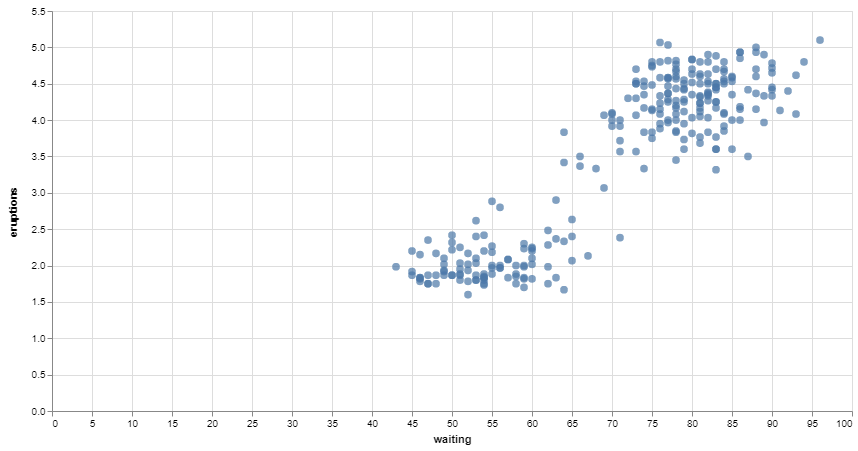

In [4]:
alt.Chart(df).mark_circle(size=60).encode(
    x='waiting',
    y='eruptions',
).properties(
    width=800,
    height=400
).interactive()

In [64]:
df['fake1'] = np.random.randint(1,100,size=len(df))
df['fake2'] = df['eruptions'] * 2 + 100

In [65]:
df.head()

,eruptions,waiting,fake1,fake2,prediction,residual,id
1,3.600,79,91,107.200,3.889756,-0.289756,1
2,1.800,54,3,103.600,2.127816,-0.327816,2
3,3.333,74,24,106.666,3.719364,-0.386364,3
4,2.283,62,28,104.566,1.886087,0.396913,4
5,4.533,85,79,109.066,4.378290,0.154710,5


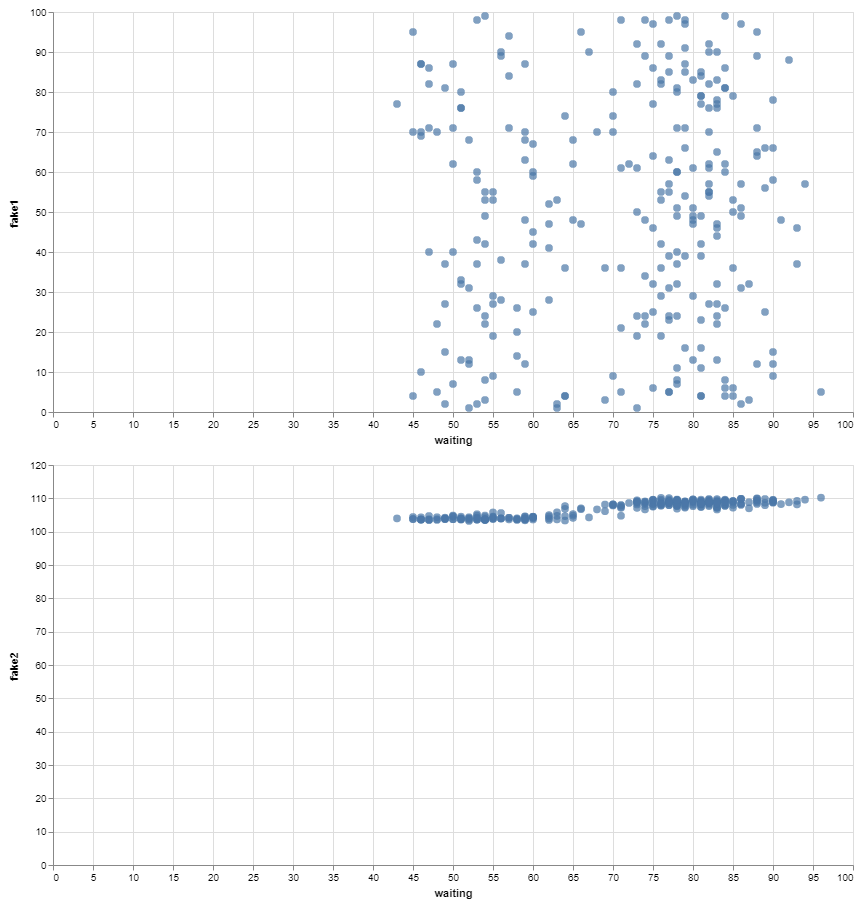

In [66]:
plot1 = alt.Chart(df).mark_circle(size=60).encode(
    x='waiting',
    y='fake1',
).properties(
    width=800,
    height=400
).interactive()

plot2 = alt.Chart(df).mark_circle(size=60).encode(
    x='waiting',
    y='fake2',
).properties(
    width=800,
    height=400
).interactive()

plot1 & plot2

In [67]:
model =  xgb.XGBRegressor(colsample_bytree=0.4,
                          gamma=0,                 
                          learning_rate=0.07,
                          max_depth=20,
                          min_child_weight=1.5,
                          n_estimators=10000,                                                                    
                          reg_alpha=0.75,
                          reg_lambda=0.45,
                          subsample=0.5,
                          seed=42,
                          n_jobs=4,
                          silent=True
                         )

In [90]:
model.fit(df['waiting'], df['eruptions'])

XGBoostError: b'[00:26:00] C:/Users/Administrator/Desktop/xgboost/src/objective/regression_obj.cu:66: Check failed: preds.Size() == info.labels_.Size() (1 vs. 272) labels are not correctly providedpreds.size=1, label.size=272'

In [89]:
model.predict(df['waiting'].values.reshape(1, -1))

array([2.849998], dtype=float32)

In [85]:
df['prediction'] = model.predict(df['waiting'])
df['residual'] = df['eruptions'] - df['prediction']
df['id'] = df.index

ValueError: Length of values does not match length of index

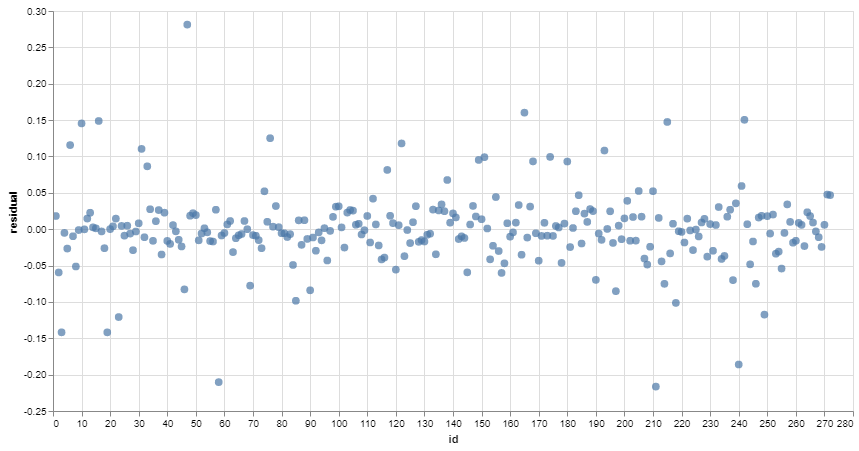

In [80]:
alt.Chart(df).mark_circle(size=60).encode(
    x='id',
    y='residual',
).properties(
    width=800,
    height=400
).interactive()

In [71]:
df_temp = df.melt(id_vars=['waiting'], value_vars=['eruptions', 'prediction'], value_name="eruptions")

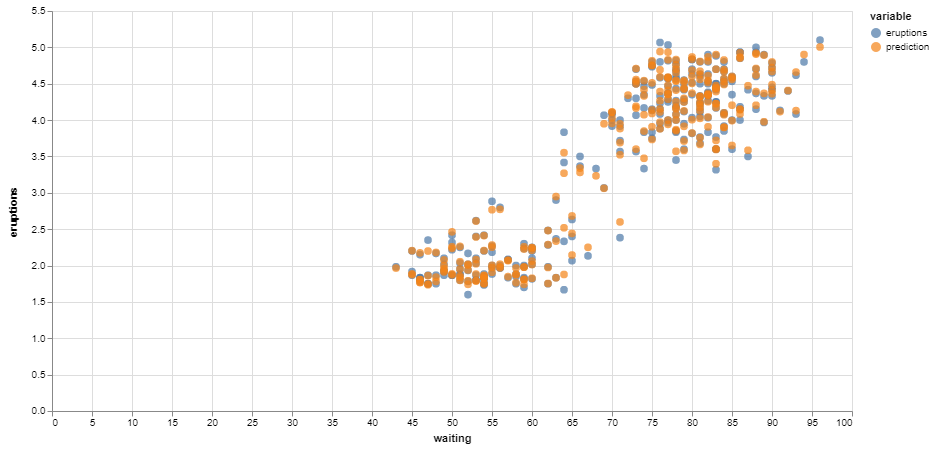

In [72]:
alt.Chart(df_temp).mark_circle(size=60).encode(
    x='waiting',
    y='eruptions',
    color="variable"
).properties(
    width=800,
    height=400
)

In [73]:
from collections import OrderedDict

In [74]:
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('fake2', 2822), ('waiting', 2762), ('fake1', 2175)])

In [75]:
np.abs(df['residual']).mean()

0.032199777666260185